### Proyecto de Montaña Rusa

Una empresa de parques de atracciones está diseñando una nueva montaña
rusa y necesita que la trayectoria de la vía sea suave y continúe en todo el recorrido.
Para esto, solicitan que se realice un modelo matemático que utilice un método de
trazador cúbico sujeto. Además, requieren que el análisis de la estabilidad
estructural de la vía se haga utilizando un polinomio de mínimos cuadrados para
ajustar los datos experimentales obtenidos de las pruebas de tensión y compresión
del material. El diseño también debe incluir el uso de polinomios ortogonales para
optimizar la forma de ciertos tramos de la vía y mejorar la experiencia del usuario.
Finalmente, se necesita resolver un sistema de ecuaciones para determinar las
fuerzas que actúan en los puntos críticos de la estructura

#### En lo siguiente se utilizara diferentes metodos matematicos para crear una montaña rusa que tenga buenas estructuras, entre otros para darle una buena experiencia al cliente, los metodos dichos antesriormente serian:

* Un Trazador cubico sujeto que sirviria para interpolar la trayectoria de la montaña rusa

* Un Polinomio de Minimos Cuadrados que seria para el analisis de la estabilidad estructural

* Polinomios Ortogonales que es para optimizar la forma de ciertos tramos de la via

* Resolucines de Ecuaciones es para determinar las fuerzas que actuan en los puntos criticos de la estructura

* Para los siguientes metodos se utilizara las librerias: scipy, numpy, matplotlib.

* Se usara el Lenguaje Julia para las siguientes Operaciones

* Sera usado .CSV para extraer los datos

* Se Graficaran los Pasos 1, 2 y 3

#### Integrantes

Sosa Andres - 30.096.794

Ruiz Irisbel - 30.864.236

### Paso 1: Trazador Cubico Sujeto

Trozos 1: a = 0.5, b = 0.0, c = 0.5106699751861044, d = -0.2106699751861043
Trozos 2: a = 0.8, b = 0.3893300248138957, c = -0.12133995037220857, d = -0.06799007444168721
Trozos 3: a = 1.0, b = -0.057320099255583234, c = -0.3253101736972702, d = 0.2826302729528535
Trozos 4: a = 0.9, b = 0.13995037220843676, c = 0.5225806451612902, d = -0.362531017369727
Trozos 5: a = 1.2, b = 0.09751861042183622, c = -0.5650124069478908, d = -0.03250620347394541


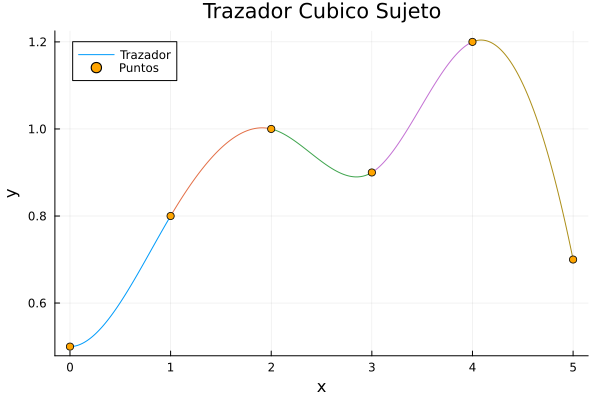

In [52]:
# Importar librerías necesarias
using CSV
using DataFrames
using Plots
using LinearAlgebra

# Llamamos a la librería CSV para leer los datos
data = CSV.read("datos_1.csv", DataFrame)
x = data[:, 1]
y = data[:, 2]
n = length(x)

# Matrices para el sistema de ecuaciones
matriz_A = zeros(4*(n-1), 4*(n-1))
matriz_B = zeros(4*(n-1))
llenar = 1

# Condiciones de continuidad y suavidad
for i in 1:n-1
    matriz_A[llenar, 4*(i-1)+1:4*i] = [1, 0, 0, 0]
    matriz_B[llenar] = y[i]
    llenar += 1
    matriz_A[llenar, 4*(i-1)+1:4*i] = [1, x[i+1]-x[i], (x[i+1]-x[i])^2, (x[i+1]-x[i])^3]
    matriz_B[llenar] = y[i+1]
    llenar += 1
    
    if i < n-1
        matriz_A[llenar, 4*(i-1)+1:4*i] = [0, 1, 2*(x[i+1]-x[i]), 3*(x[i+1]-x[i])^2]
        matriz_A[llenar, 4*i+2] = -1
        llenar += 1

        matriz_A[llenar, 4*(i-1)+1:4*i] = [0, 0, 2, 6*(x[i+1]-x[i])]
        matriz_A[llenar, 4*i+3] = -2
        llenar += 1
    end
end

# Creamos unas condiciones de frontera
matriz_A[llenar, 2] = 1
llenar += 1
matriz_A[llenar, end-2] = 2
matriz_A[llenar, end] = 6*(x[end]-x[end-1])
resolviendo = matriz_A\matriz_B

# Funcion del trazador cubico
function S(xi, a, b, c, d, x)
    return a .+ b .* (x .- xi) .+ c .* (x .- xi).^2 .+ d .* (x .- xi).^3
end

# Grraficamos los trazadores cúbicos y graficamos tambien sus trozos
plot()
for i in 1:n-1
    a, b, c, d = resolviendo[4*(i-1)+1:4*i]
    println("Trozos $i: a = $a, b = $b, c = $c, d = $d")
    xi = x[i]
    xip1 = x[i+1]
    x_range = xi:0.01:xip1
    y_range = S(xi, a, b, c, d, x_range)
    plot!(x_range, y_range, label=i == 1 ? "Trazador" : "")
end
scatter!(x, y, label="Puntos", color=:orange)
xlabel!("x")
ylabel!("y")
title!("Trazador Cubico Sujeto")

#### Paso 2: Polinomio de Mínimos Cuadrados

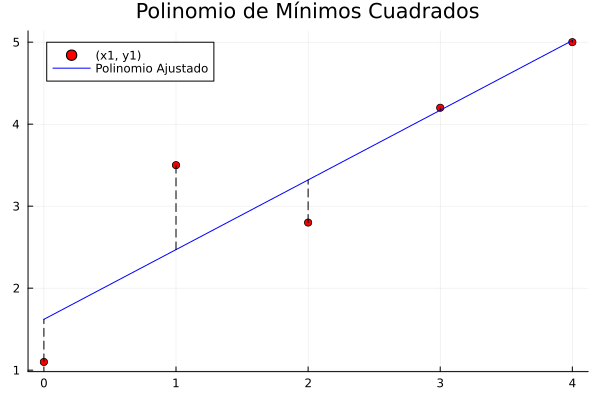

In [79]:
using CSV
using DataFrames
using Plots
using LinearAlgebra

# Extraemos los datos del archivo CSV
datos = CSV.read("Datos_2.csv", DataFrame)
x1 = datos.x1
y1 = datos.y1

# Calculamos para el ajuste polinomial(terminos)
terminos = length(x1)
promediolista1 = mean(x1)
promediolista2 = mean(y1)
Ex = sum(x1)
Ey = sum(y1)
Exy = sum(x1 .* y1)
Ex2 = sum(x1 .^ 2)
Ey2 = sum(y1 .^ 2)

# Calculamos los coeficientes
coeficienteA1 = (terminos * Exy - Ex * Ey) / (terminos * Ex2 - Ex^2)
coeficienteA0 = promediolista2 - coeficienteA1 * promediolista1
# Definimos funcion para el ajuste polinomial
ajuste_polinomio(x) = coeficienteA0 + coeficienteA1 * x
valoresdexparagraficar = range(minimum(x1), stop=maximum(x1), length=100)
valoresdeyparagraifcar = ajuste_polinomio.(valoresdexparagraficar)

#Graficamos
scatter(x1, y1, label="(x1, y1)", color=:red)
plot!(valoresdexparagraficar, valoresdeyparagraifcar, label="Polinomio Ajustado", color=:blue)

for i in 1:terminos
    xi = x1[i]
    yi = y1[i]
    y_ajustado = ajuste_polinomio(xi)
    plot!([xi, xi], [yi, y_ajustado], color=:black, linestyle=:dash, label=false)
end
plot!(title="Polinomio de Mínimos Cuadrados")
plot!(legend=:topleft)

display(current())
